## Logistic Regression

This uses the feature engineered csv done by Ding Hao

In [1]:
import sys
sys.path.append('../..')

import json
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from src.evaluation import FraudEvaluationMetrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../../data/processed/creditcard_fe.csv')

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V27,V28,Amount,Class,Hour,Hour_sin,Day,log_Amount,Time_bin,Amount_bin
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.133558,-0.021053,149.62,0,0.0,0.000000,0.0,5.008099,0,2
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.008983,0.014724,2.69,0,0.0,0.000000,0.0,0.989542,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.055353,-0.059752,378.66,0,0.0,0.000000,0.0,5.936639,0,2
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.062723,0.061458,123.50,0,0.0,0.000000,0.0,4.816241,0,2
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.219422,0.215153,69.99,0,0.0,0.000000,0.0,4.248352,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.943651,0.823731,0.77,0,23.0,-0.258819,1.0,-0.261363,3,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.068472,-0.053527,24.79,0,23.0,-0.258819,1.0,3.210440,3,1
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.004455,-0.026561,67.88,0,23.0,-0.258819,1.0,4.217741,3,2
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.108821,0.104533,10.00,0,23.0,-0.258819,1.0,2.302585,3,1


In [4]:
evaluator = FraudEvaluationMetrics(cost_fp=550, cost_fn=110)  

## Version 1 (With all features)

In [5]:
X = df.drop(columns=['Class'])
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
print(y_train.value_counts('Class'))
print(y_test.value_counts('Class'))

Class
0    0.998271
1    0.001729
Name: proportion, dtype: float64
Class
0    0.99828
1    0.00172
Name: proportion, dtype: float64


In [7]:
# Train a logistic regression model
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = log_reg.predict(X_test)
y_scores = log_reg.predict_proba(X_test)[:, 1]

In [8]:
evaluator.business_cost_analysis(y_test, y_pred)

=== BUSINESS COST ANALYSIS ===
False Positive Cost (FP × 550): 4950
False Negative Cost (FN × 110): 4510
Total Cost: $9460
Baseline Cost (No Detection): $10780
Cost Savings vs No Detection: $1320 (12.24%)
False Positives: 9
False Negatives: 41
True Positives: 57
True Negatives: 56855


{'fp_cost_total': np.int64(4950),
 'fn_cost_total': np.int64(4510),
 'total_cost': np.int64(9460),
 'false_positives': np.int64(9),
 'false_negatives': np.int64(41),
 'true_positives': np.int64(57),
 'true_negatives': np.int64(56855)}

## Version 2 (Some features dropped)

In [9]:
X_v2 = df.drop(columns=['Class','V22','V23','V15','V13','V26','V20','V24','V25','V19','Amount','Time',
'log_Amount','Hour'])
y_v2 = df['Class']

X_train_v2, X_test_v2, y_train_v2, y_test_v2 = train_test_split(X_v2, y_v2, test_size=0.2, random_state=42)

In [10]:
# Train logistic regression model
logreg_baseline_final = LogisticRegression(max_iter=10000)

In [11]:
joblib.dump(logreg_baseline_final, '../../models/log_baseline.pkl')

['../../models/log_baseline.pkl']

In [12]:
logreg_baseline_final = joblib.load('../../models/logreg_baseline.pkl')

In [13]:
logreg_baseline_final.fit(X_train_v2, y_train_v2)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


In [14]:
# Train on training set
logreg_baseline_final.fit(X_train_v2, y_train_v2)

# Make predictions on ENTIRE dataset (not just test set)
y_pred_v2_full = logreg_baseline_final.predict(X_v2)
y_scores_v2_full = logreg_baseline_final.predict_proba(X_v2)[:, 1]

# Also keep test set predictions for comparison
y_pred_v2 = logreg_baseline_final.predict(X_test_v2)
y_scores_v2 = logreg_baseline_final.predict_proba(X_test_v2)[:, 1]

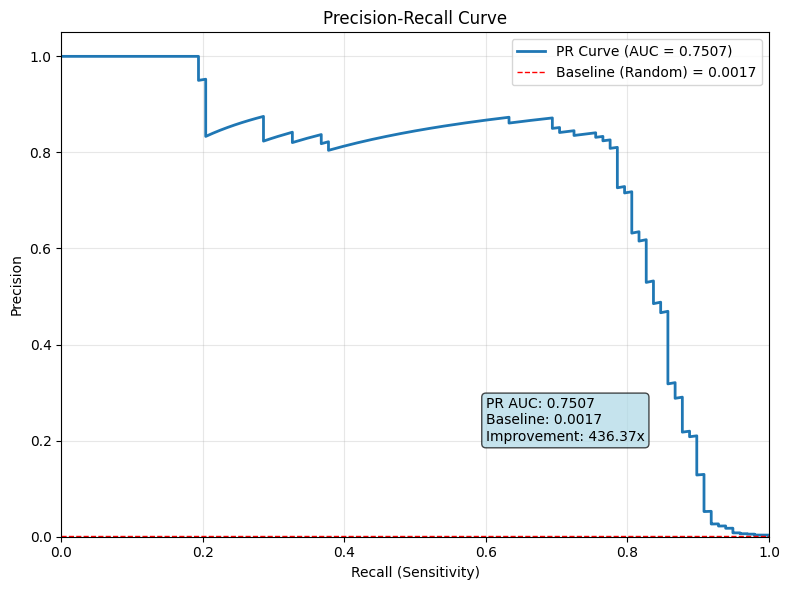

0.7507468956513703

In [15]:
evaluator.plot_pr_curve(y_test_v2, y_scores_v2)

In [16]:
print("="*60)
print("TEST SET EVALUATION (20% of data)")
print("="*60)
bcr_test = evaluator.business_cost_analysis(y_test_v2, y_pred_v2)

print("\n" + "="*60)
print("FULL DATASET EVALUATION (100% of data)")
print("="*60)
bcr_full = evaluator.business_cost_analysis(y_v2, y_pred_v2_full)

# Save FULL dataset results to JSON (comprehensive business analysis)
evaluator.save_results(bcr_full, save_path='../../results/baseline/logreg_results.json')

print("\n" + "="*60)
print("RESULTS SAVED SUCCESSFULLY")
print("="*60)
print("Saved full dataset evaluation results for comprehensive business cost analysis")

TEST SET EVALUATION (20% of data)
=== BUSINESS COST ANALYSIS ===
False Positive Cost (FP × 550): 4950
False Negative Cost (FN × 110): 4510
Total Cost: $9460
Baseline Cost (No Detection): $10780
Cost Savings vs No Detection: $1320 (12.24%)
False Positives: 9
False Negatives: 41
True Positives: 57
True Negatives: 56855

FULL DATASET EVALUATION (100% of data)
=== BUSINESS COST ANALYSIS ===
False Positive Cost (FP × 550): 22550
False Negative Cost (FN × 110): 20900
Total Cost: $43450
Baseline Cost (No Detection): $54120
Cost Savings vs No Detection: $10670 (19.72%)
False Positives: 41
False Negatives: 190
True Positives: 302
True Negatives: 284274

Results saved to: ../../results/baseline/logreg_results.json
Total Cost: $43,450

RESULTS SAVED SUCCESSFULLY
Saved full dataset evaluation results for comprehensive business cost analysis
